Data Parsing for Selecting Samples to Sequence

In [2]:
import pandas as pd
import datetime
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Get subset of columns that we need

In [362]:
imported_cols = ['institution', 'catalog_num', 'genus_species', 'sample_date', 'state', 'county', 'locality', 'sex', 'concentration', '260/280', '260/230', 'extraction_notes', 'lat', 'long']
df = pd.read_csv('Aphelocoma_sample_data.csv', usecols=imported_cols)
df

,institution,catalog_num,genus_species,sample_date,lat,long,state,county,locality,sex,concentration,260/280,260/230,extraction_notes
0,LACM,104982,Aphelocoma californica obscura,1990-01-09,34.30000,-117.92000,CA,Los Angeles,U,F,3.80,1.246,0.190,Two elutions performed. Spectrophotometry data...
1,LACM,107754,Aphelocoma californica nevadae,1993-10-25,35.32000,-115.21000,CA,San Bernardino,U,M,5.20,1.444,0.183,Two elutions performed. Spectrophotometry data...
2,LACM,104980,Aphelocoma californica obscura,1990-01-09,34.30000,-117.92000,CA,Los Angeles,U,M,17.00,0.881,0.503,Two elutions performed. Spectrophotometry data...
3,LACM,104981,Aphelocoma californica obscura,1990-01-09,34.30000,-117.92000,CA,Los Angeles,U,M,4.70,1.593,0.167,Two elutions performed. Spectrophotometry data...
4,UWBM,46815,Aphelocoma californica,1991-08-01,40.34000,-121.90000,CA,Tehama,"Red Bluff, 11 mi N, 17 mi E; 600 m; Habitat: b...",F,59.95,2.078,1.452,Dropped Sample on Counter. Eluted with 200 uL ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,MVZ,195825,Aphelocoma californica californica,2023-03-31,37.37822,-121.72994,CA,Santa Clara,Blue Oak Ranch Reserve,M,301.70,1.918,1.969,Did not weigh. All MVZ samples appear to have ...
58,MVZ,195826,Aphelocoma californica californica,2023-03-31,37.38916,-121.74998,CA,Santa Clara,Blue Oak Ranch Reserve,M,275.00,1.957,1.999,Did not weigh. All MVZ samples appear to have ...
59,MVZ,194938,Aphelocoma californica obscura,2017-09-13,37.38056,-121.74188,CA,NaN,"Black Rock Spring, Joshua Tree National Park",F,376.90,1.920,2.214,Did not weigh. All MVZ samples appear to have ...
60,MVZ,193675,Aphelocoma californica californica,2021-04-26,36.36119,-120.85934,CA,San Benito,Lorenzo Vasque Canyon along Coalinga Rd.,M,927.80,1.945,2.218,Did not weigh. All MLZ samples appear to have ...


Reformat some of the data

In [363]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%Y-%m-%d')
inst_code_lst = df['institution'] + '_' + df['catalog_num'].astype(str)
df.insert(0, 'institution_code', pd.Series(inst_code_lst))
df = df.drop(['institution', 'catalog_num'], axis=1)
df['coords'] = list(zip(df['long'], df['lat']))
df['coords'] = df['coords'].apply(Point)
df = df.drop(['lat', 'long'], axis=1)

Add Pre-Post WNV Column

In [364]:
pre_post_WNV = []
for row in df.index:
    if df.loc[row, 'sample_date'].year <= 2000:
        pre_post_WNV.append('pre')
    elif df.loc[row, 'sample_date'].year >= 2015:
        pre_post_WNV.append('post')
    else:
        pre_post_WNV.append('post_not_preferred')
df.insert(3, 'pre_post', pd.Series(pre_post_WNV))

In [365]:
df

,institution_code,genus_species,sample_date,pre_post,state,county,locality,sex,concentration,260/280,260/230,extraction_notes,coords
0,LACM_104982,Aphelocoma californica obscura,1990-01-09,pre,CA,Los Angeles,U,F,3.80,1.246,0.190,Two elutions performed. Spectrophotometry data...,POINT (-117.92 34.3)
1,LACM_107754,Aphelocoma californica nevadae,1993-10-25,pre,CA,San Bernardino,U,M,5.20,1.444,0.183,Two elutions performed. Spectrophotometry data...,POINT (-115.21 35.32)
2,LACM_104980,Aphelocoma californica obscura,1990-01-09,pre,CA,Los Angeles,U,M,17.00,0.881,0.503,Two elutions performed. Spectrophotometry data...,POINT (-117.92 34.3)
3,LACM_104981,Aphelocoma californica obscura,1990-01-09,pre,CA,Los Angeles,U,M,4.70,1.593,0.167,Two elutions performed. Spectrophotometry data...,POINT (-117.92 34.3)
4,UWBM_46815,Aphelocoma californica,1991-08-01,pre,CA,Tehama,"Red Bluff, 11 mi N, 17 mi E; 600 m; Habitat: b...",F,59.95,2.078,1.452,Dropped Sample on Counter. Eluted with 200 uL ...,POINT (-121.9 40.34)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,MVZ_195825,Aphelocoma californica californica,2023-03-31,post,CA,Santa Clara,Blue Oak Ranch Reserve,M,301.70,1.918,1.969,Did not weigh. All MVZ samples appear to have ...,POINT (-121.72994 37.37822)
58,MVZ_195826,Aphelocoma californica californica,2023-03-31,post,CA,Santa Clara,Blue Oak Ranch Reserve,M,275.00,1.957,1.999,Did not weigh. All MVZ samples appear to have ...,POINT (-121.74998 37.38916)
59,MVZ_194938,Aphelocoma californica obscura,2017-09-13,post,CA,NaN,"Black Rock Spring, Joshua Tree National Park",F,376.90,1.920,2.214,Did not weigh. All MVZ samples appear to have ...,POINT (-121.74188 37.38056)
60,MVZ_193675,Aphelocoma californica californica,2021-04-26,post,CA,San Benito,Lorenzo Vasque Canyon along Coalinga Rd.,M,927.80,1.945,2.218,Did not weigh. All MLZ samples appear to have ...,POINT (-120.85934 36.36119)


Separate Pre-Post Samples into Separate Dataframes to examine each time period

In [366]:
pre_df = df[df['pre_post']=='pre']
post_df = df[df['pre_post']!='pre']

Further subsetting and sample filtering

In [367]:
for time_df in [pre_df, post_df]:
    for row in time_df.index:
        # Remove any samples that are not californica
        if 'californica' not in time_df.loc[row, 'genus_species']:
            time_df.drop(row, inplace=True)
        # Remove Samples in AZ (have no time counterpart) and samples from NV (specifically Douglas Co. since this is a contact zone with woodhouseii)
        elif time_df.loc[row, 'state'] in ['AZ', 'NV']:
            time_df.drop(row, inplace=True)
        # Remove any samples that are where 260/230 is below 1.8
        elif time_df.loc[row, '260/280'] <1.8:
            time_df.drop(row, inplace=True)

/tmp/ipykernel_8743/619365809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df.drop(row, inplace=True)
/tmp/ipykernel_8743/619365809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df.drop(row, inplace=True)
/tmp/ipykernel_8743/619365809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df.drop(row, inplace=True)
/tmp/ipykernel_8743/619365809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

In [376]:
pre_df

,institution_code,genus_species,sample_date,pre_post,state,county,locality,sex,concentration,260/280,260/230,extraction_notes,coords
4,UWBM_46815,Aphelocoma californica,1991-08-01,pre,CA,Tehama,"Red Bluff, 11 mi N, 17 mi E; 600 m; Habitat: b...",F,59.95,2.078,1.452,Dropped Sample on Counter. Eluted with 200 uL ...,POINT (-121.9 40.34)
5,UWBM_46816,Aphelocoma californica,1991-08-01,pre,CA,Tehama,"Red Bluff, 11 mi N, 17 mi E; 600 m; Habitat: b...",M,36.40,2.034,1.190,Eluted with 200 uL Buffer AE,POINT (-121.9 40.34)
6,UWBM_46824,Aphelocoma californica,1991-08-09,pre,CA,Tehama,"Red Bluff, 12 mi N, 18 mi E; 600 m; Habitat: d...",F,52.25,1.979,1.082,Eluted with 200 uL Buffer AE,POINT (-121.88 40.35)
7,UWBM_46835,Aphelocoma californica,1991-08-10,pre,CA,Butte,"Chico, 5 mi N, 10 mi W; Habitat: mature valley...",F,54.20,2.026,1.286,Eluted with 200 uL Buffer AE,POINT (-122.01 39.8)
8,UWBM_46838,Aphelocoma californica,1991-08-10,pre,CA,Butte,"Chico, 5 mi N, 10 mi W; Habitat: mature valley...",M,19.05,2.016,1.052,Two elutions performed. Spectrophotometry data...,POINT (-122.01 39.8)
9,UWBM_46842,Aphelocoma californica,1991-08-11,pre,CA,Butte,"Chico, 5 mi N, 10 mi W; Habitat: mature valley...",F,35.20,2.186,1.411,Two elutions performed. Spectrophotometry data...,POINT (-122.01 39.8)
10,UWBM_47940,Aphelocoma californica,1990-08-17,pre,CA,Lassen,"Susanville, 15 mi N; 1750 m; Habitat: juniper ...",M,4.60,1.878,0.123,Given an additional 1 min 8K RPM centrifuge to...,POINT (-120.65 40.63)
11,UWBM_47967,Aphelocoma californica,1990-08-11,pre,CA,Lassen,"Susanville, 15 mi N; 1750 m; Habitat: yellow p...",M,34.70,2.142,0.911,Two elutions performed. Spectrophotometry data...,POINT (-120.65 40.63)
12,UWBM_51050,Aphelocoma californica,1989-11-14,pre,WA,Klickitat,"Lyle, 1.25 mi N, 2 mi W",M,65.80,2.179,1.548,Two elutions performed. Spectrophotometry data...,POINT (-121.33 45.71)
13,UWBM_58204,Aphelocoma californica,1997-06-27,pre,WA,Klickitat,"Bingen, 1 mi S, 2.75 mi E; 100 m; Habitat: oak...",M,38.05,2.120,0.852,Two elutions performed. Spectrophotometry data...,POINT (-121.41 45.7)


In [369]:
post_df

,institution_code,genus_species,sample_date,pre_post,state,county,locality,sex,concentration,260/280,260/230,extraction_notes,coords
16,UWBM_107261,Aphelocoma californica,2017-07-21,post,WA,King,Enumclaw,F,109.20,2.056,2.180,Two elutions performed. Spectrophotometry data...,POINT (-121.9915 47.2043)
17,UWBM_107528,Aphelocoma californica,2018-07-14,post,WA,King,"Kent; 818 3rd Ave N; 47.389, -122.236",F,184.70,1.908,2.215,Two elutions performed. Spectrophotometry data...,POINT (-122.236 47.389)
18,UWBM_124123,Aphelocoma californica,2018-06-20,post,OR,Lake,"Adel, 10.5 mi SW; 42.04, -119.98; 5170 ft; Hab...",F,219.05,1.959,2.195,Two elutions performed. Spectrophotometry data...,POINT (-119.98 42.04)
19,UWBM_124563,Aphelocoma californica,2019-06-22,post,OR,Klamath,"Bonanza, 22.5 mi SE; 42, -121.06; 4800 ft; Hab...",M,174.80,1.955,2.085,Two elutions performed. Spectrophotometry data...,POINT (-121.06 42)
20,UWBM_124665,Aphelocoma californica,2018-06-20,post,OR,Lake,"Adel, 10.5 mi SW; 42.037, -119.984; 4890 ft; H...",M,503.25,1.960,2.295,Two elutions performed. Spectrophotometry data...,POINT (-119.984 42.037)
21,UWBM_125034,Aphelocoma californica,2018-09-21,post,OR,Klamath,"Bonanza, 18 mi SE; 42.029, -121.143; 4425 ft; ...",M,269.85,1.911,2.328,Two elutions performed. Spectrophotometry data...,POINT (-121.143 42.029)
23,UWBM_125386,Aphelocoma californica,2018-07-22,post,WA,Pierce,Dupont; McNeil Circle,M,933.60,2.019,2.325,Two elutions performed. Spectrophotometry data...,POINT (-122.6448 47.1003)
24,UWBM_126863,Aphelocoma californica,2020-06-11,post,WA,King,"Enumclaw, 1 mi N",U,276.00,1.888,2.148,Two elutions performed. Spectrophotometry data...,POINT (-121.9915 47.2043)
25,UWBM_127042,Aphelocoma californica,2018-07-18,post,WA,Lewis,Centralia; S Scheuber Rd.,F,538.90,1.966,2.162,Two elutions performed. Spectrophotometry data...,POINT (-122.96 46.73)
33,MLZ_68995,Aphelocoma californica obscura,2015-05-01,post,CA,Ventura,"Blue Hill Farm, 8625 N Ventura Avenue",M,139.05,1.955,2.118,Two elutions performed. Spectrophotometry data...,POINT (-119.307019 34.366979)


Plotting Function

In [370]:
def plot_coord_points(county_query, state_query, df, point_color):
    state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
    county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
    gdf = gpd.GeoDataFrame(df, geometry='coords')
    county_df = county_df.query(county_query)
    fig, gax = plt.subplots(figsize=(10, 10))

    state_df.query(state_query).plot(ax=gax, edgecolor="black", color="white")
    #county_df.plot(ax=gax, edgecolor="black", color="white")
    gdf.plot(ax=gax, color=point_color, alpha = 0.5)

    plt.show()

Query variables for our various plots

In [371]:
coastal_states_co = "STATEFP == '06' or STATEFP == '53' or STATEFP == '41'"
coastal_states = "NAME == 'California' or NAME == 'Washington' or NAME == 'Oregon'"

all_states_co = "STATEFP == '06' or STATEFP == '53' or STATEFP == '41' or STATEFP == '04' or STATEFP == '49' or STATEFP == '08' or STATEFP == '32'"
all_states = "NAME == 'California' or NAME == 'Washington' or NAME == 'Oregon' or NAME == 'Arizona' or NAME == 'Utah' or NAME == 'Colorado' or NAME == 'Nevada'"

Pre WNV

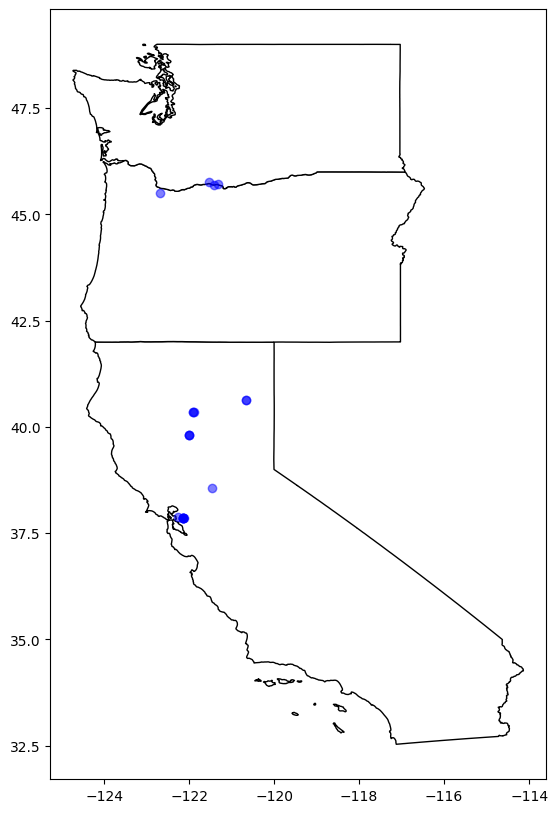

In [372]:
plot_coord_points(coastal_states_co, coastal_states, pre_df, 'blue')

Post WNV

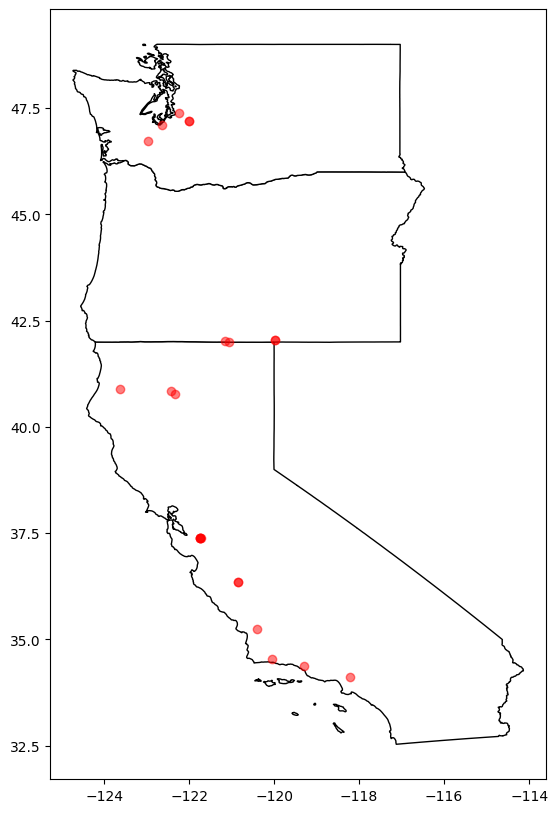

In [373]:
plot_coord_points(coastal_states_co, coastal_states, post_df, 'red')

All Samples

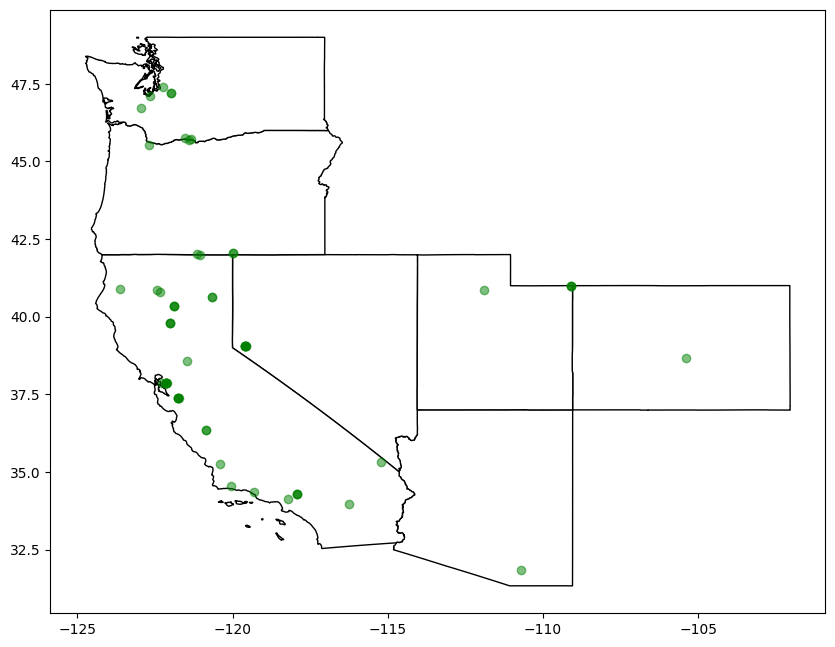

In [374]:
plot_coord_points(all_states_co, all_states, df, 'green')

In [4]:
df = pd.read_csv('Aphelocoma_sample_data.csv')

In [ ]:
for row in df.index:
    if df.loc[row, 'state'] == 'California':
        df.loc[row, 'state'] = 'CA'
    if df.loc[row, 'state'] == 'Oregon':
        df.loc[row, 'state'] = 'OR'